# Problem 1 - Convolutional Neural Networks Architectures

## 1.1

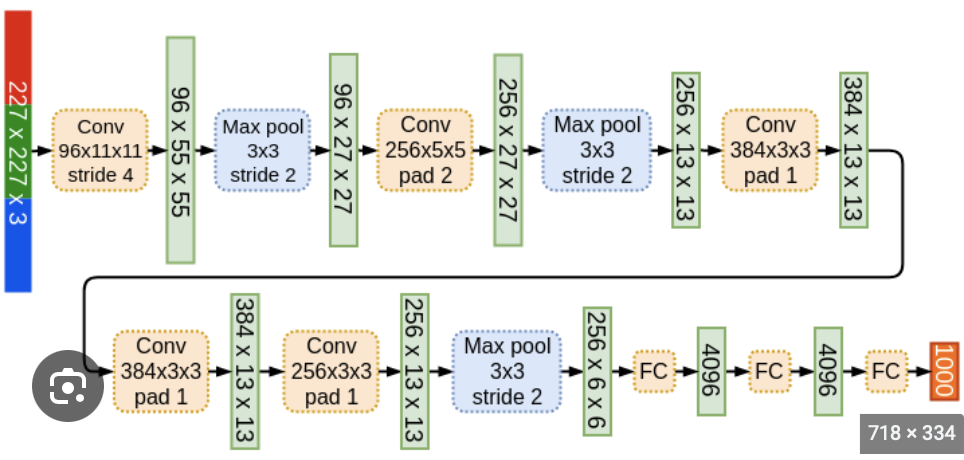

Source: https://www.oreilly.com/library/view/advanced-deep-learning/9781789956177/b2258aa6-2c18-449c-ac00-939e812f5a4a.xhtml

**Answer:**

Layer | Output Size | Strides | Padding | Weight | Biases | Parameters
:-----:|:----------:|:---:|:---------:|:-----:|:---:|:---:
Input | 224x224x3 | - | - | - | - | 0
Conv-1 | 55x55x96 | 4 | 0 | 11x11x3x96 = 34,848 | 96 | 34,944
MaxPool-1 | 27x27x96 | 2 | 0 | 0| 0 | 0
Conv-2 | 27x27x256 | 1 | 2 | 5x5x48x256 = 307,200  | 256 | 307,456
MaxPool-2 | 13x13x256 | 2 | 0 | 0 | 0 | 0
Conv-3 | 13x13x384 | 1 | 1 | 3x3x256x384 = 884,736 | 384 | 885,120
Conv-4 | 13x13x384 | 1 | 1 | 3x3x192x384 = 663,552 | 384 | 663,936
Conv-5 | 13x13x256 | 1 | 1 | 3x3x192x256 = 442,368| 256 | 442,624
MaxPool-3 | 6x6x256 | 2 | 0 | 0 | 0 | 0
FC-1 | 4096x1 | - | - | 6x6x256x4096 = 37,748,736 | 4096 | 37,752,832
FC-2 | 4096x1 | - | - | 4096x4096 = 16,777,216 | 4096 | 16,781,312
FC-3 | 1000x1 | - | - | 4096x1000 = 4,096,000 | 1000 | 4,097,000
Output | 1000x1 | - | - | 0 | 0 | 0
**Total** | | | | | | **60,965,224**



Paramaters = Weight + Bias

## 1.2

**Answer:**

Layer | Number of Activations (Momery) | Parameters (Compute)
:-----:|:----------:|:---:
Input | 224\*224\*3 = 150.5K | 0
CONV3-64 | 224\*224\*64 = 3.2M | (3\*3\*3)\*64 = 1,728
CONV3-64 | 224\*224\*64 = 3.2M | (3\*3\*64)\*64 = 36,864
POOL2 |  112\*112\*64 = 802.8K | 0
CONV3-128 | 112\*112\*128 = 1.6M | (3\*3\*64)\*128 = 73,728
CONV3-128 | 112\*112\*128 = 1.6M | (3\*3\*128)\*128 = 147,456
POOL2 |  56\*56\*128 = 401K | 0
CONV3-256 | 56\*56\*256 = 802.8K | (3\*3\*128)\*256 = 294,912
CONV3-256 | 56\*56\*256 = 802.8K | (3\*3\*256)\*256 = 589,824
CONV3-256 | 56\*56\*256 = 802.8K | (3\*3\*256)\*256 = 589,824
CONV3-256 | 56\*56\*256 = 802.8K | (3\*3\*256)\*256 = 589,824
POOL2 | 28\*28\*256= 200.7K | 0
CONV3-512 | 28\*28\*512 = 401K | (3\*3\*256)\*512 = 1,179,648
CONV3-512 | 28\*28\*512 = 401K | (3\*3\*512)\*512 = 2,359,296
CONV3-512 | 28\*28\*512 = 401K | (3\*3\*512)\*512 = 2,359,296
CONV3-512 | 28\*28\*512 = 401K | (3\*3\*512)\*512 = 2,359,296
POOL2 | 14\*14\*512= 100.4K | 0
CONV3-512 | 14\*14\*512= 100.4K | (3\*3\*512)\*512 = 2,359,296
CONV3-512 | 14\*14\*512= 100.4K | (3\*3\*512)\*512 = 2,359,296
CONV3-512 | 14\*14\*512= 100.4K | (3\*3\*512)\*512 = 2,359,296
CONV3-512 | 14\*14\*512= 100.4K | (3\*3\*512)\*512 = 2,359,296
POOL2 | 7\*7\*512= 25,088 | 0
FC | 4096 | 25,088*4096 = 102,760,448
FC | 4096 | 4096*4096 = 16,777,216
FC | 1000 | 4096*1000 = 4,096,000
**Total** | **16,508,888 activations** | **143,632,544 parameters**



## 1.3

**Answer:**

We want to show that the stack of N convolution layers, each of the filter size F x F has the same receptive field as 1 convolutional layer with the filter size of (NF − N + 1) × (NF − N + 1).

We can do this by first calulating receptive field of the stack of N convolutional layers (each with filter size FxF):
- 1st convolutional layer -> Receptive Field 1 = F
- 2nd convolutional layer -> Receptive Field 2 = Filter size + growth in the receptive field due to the first layer
  - Receptive Field 2 = RF1 + (F-1) = F + F - 1 = 2F -1
  - Note we use F-1 due to the fact that when applying filter we skip/pass F-1 elements on either size of the filter

- 3rd convolutional layer -> Receptive Field 2 = RF2 + (F-1) = 2F-1 + F -1 = 3F - 2
n
At this point we can notice a recursive pattern, with each following layer N, our receptive field RFN = N * F + (N - 1) which is equivalent to NF - N + 1.

Thus, we have shown that for the stack of N convolutional layers, each of the filter size FxF has the same receptive field as 1 convolutional layer with the size (NF - N + 1) x (NF - N + 1).

Lets show this while calculating receptive field of 3 filters of size 5x5:
- Lets first calculate this layer by layer:
  - RF 1 = F = 5
  - RF 2 = RF 1 + (F-1) = 5 + (5-1) = 9
  - RF 3 = RF 2 + (F-1) = 9 + (5-1) = 13
  - Thus, **Receptive Field 3 = 13**

- Lets now calculate this using our formula NF - N + 1:
  - N = 3, F = 5
  - NF - N + 1 = 3 * 5 - 3 + 1 = 15 - 2 = 13
  - Thus, **Receptive Field 3 = 13**

We have shown that using either method we know that the receptive field of 3 filters of size 5 x 5 is equal to 13 x 13.







## 1.4

### 1.4 (a)

**Answer:**

The general idea behind designing an inception model is to imporove the networks ability to learn/capture and represent features on different scales. Inception model uses parallel convolutional filters of different sizes with a pooling followed by concatenation which allow it to learn features at a wide range of scales from small local features to large global features. After these features have been captures pooling layer reduces the spatial size of the feature maps which makes it easier for the model to capture higher-level features. Finally, the concatenation layer then combines the feature maps from the different convolutional filters, which allows the network to learn features that are on different scales. This is particularly useful when we are working with images as they have patterns at different scales. When using multiple filter sizes in parallel (e.g. 1x1, 3x3 and 5x5 as in the example) in parallel, the model can learn features at different scales at the same time. In addition to this, inception model allows for increased depth and without increasing the cost by too much since it does not need to directly apply larger convolutions that can be expensive but can first use smaller ones (e.g. 1x1) to reduce the dimension of the data and with that the computational cost.

To sum up, model was made to allow for "increasing the depth and width of the network while keeping the computational budget constant." In the end, the model has been shown to increase both accuracy and efficiency as well as reduce overfitting to the training data.  



### 1.4 (b)

ssuming the input to the inception module (referred to as ”previous layer” in Figure 2 of the paper) has a size of 32x32x256, calculate the output size after each filter as well as filter concate- nation for both the naive and dimensionality reduction inception architectures with the number of filters given in Figure 1. (4)


**Answer:**

- Naive version:

  - 1x1 convolutions (128): 32x32x128
  - 3x3 convolutions (192): 32x32x192
  - 5x5 convolutions (96): 32x32x96
  - 3x3 max pooling: 32x32x256 (unchanged depth)
  - **Filter concatenation: 128+192+96+256 = 672 -> Output size = 32x32x672**

- Dimension reductions:

  - 1x1 convolutions (128): 32x32x128
  - 1x1 convolutions (128): 32x32x128
  - 3x3 convolutions (192): 32x32x192
  - 1x1 convolutions (32): 32x32x32
  - 5x5 convolutions (96): 32x32x96
  - 3x3 max pooling: 32x32x256
  - 1x1 convolutions (64): 32x32x64
  - **Filter concatenation: 128 + 192 + 96 + 64 = 480 -> Output size = 32x32x480**
    - Note: we only combine depths of the layers directly previous to the filter concatenation not all layers.

### 1.4 (c)

**Answer:**

- Naive version:

  - 1x1 convolutions (128): 1x1x32x32x256x128 = 33,554,432
  - 3x3 convolutions (192): 3x3x32x32x256x192 = 452,984,832
  - 5x5 convolutions (96): 5x5x32x32x256x96 = 629,145,600
  - 3x3 max pooling: 0 convolution operations
  - **Total: 1,115,684,864 operations**

- Dimension reductions:

  - 1x1 convolutions (128): 1x1x32x32x256x128 = 33,554,432
  - 1x1 convolutions (128): 1x1x32x32x256x128 = 33,554,432
  - 3x3 convolutions (192): 3x3x32x32x128x192 = 226,492,416
  - 1x1 convolutions (32): 1x1x32x32x256x32 = 8,388,608
  - 5x5 convolutions (96): 5x5x32x32x32x96 = 78,643,200
  - 3x3 max pooling: 0 convolution operations
  - 1x1 convolutions (64): 1x1x32x32x256x64 = 16,777,216
  - **Total: 397,410,304 operations**

### 1.4 (d)

Based on the calculations in part (c), explain the problem with naive architecture and how di- mensionality reduction architecture helps (Hint: compare computational complexity). How much is the computational saving? (2+2)

**Answer:**

The main difference we can immediately notice between naive module and dimensionality reduced one is massive difference in computational complexity. More precisely, the inception model with naive architecture might be simple but it requires extremely high number of convolutional operations which in turn leads to very high computational costs. This is especially problematic (and expensive) when using larger convolutions (e.g. 5x5) as they require more computations. Using these large computations directly on our input gets even more expensive is we have a deep input tensor such as the one we were working with (256). Using dimensionality reduction can rectify this issue by using smaller (e.g. 1x1) convolutions before the expensive larger convolutions (like 5x5). By doing this we reduce the depth of the tensor before large convolutions and with that decrease the number of necessary operations and consequently the cost of them. While introducing additional smaller layers does cause a need for more computations (since we have more layers) they are worth it as they can significantly reduce computations on following larger layers that come after them.

In our specific case, there were 1,115,684,864 total computations in naive version and 397,410,304 in dimension reduction version. Subtracting these numbers we can see that we saved 718,274,560 operations by using dimensionality reduction version rather than naive version. This means that dimensionality reduction version uses less than 36% of the computations compared to the naive version which is an incredible reduction in computational time/complexity and with that cost. This means that using inception model with dimensionality reduction is cheaper, more efficient, and faster than the naive version.


## 1.5

### 1.5 (a)

**Answer:**

One of the main differences between Faster R-CNN and Fast R-CNN is the way they generate region proposals. More specifically Fast R-CNNs use selective search algorithm to generate region proposals. This process is considered quite slow, especially when copared to Faster R-CNNs approach. In Faster R-CNNs selective search algorithm is exchanges for Region Proposal Network (RPN) that is able to generate region proposals within the network eliminating a need for external methods (like selective search) and with that significantly cutting down processing time. In additon to this change, Faster R-CNNs share a convolutional feature extractor for both RPN and object detection network which makes them more efficient. Further, in Faster R-CNNs new loss function is introduces and well as new training algorithm, all to make it more efficient and accurate compared to Fast R-CNNs.


### 1.5 (b)

**Answer:**


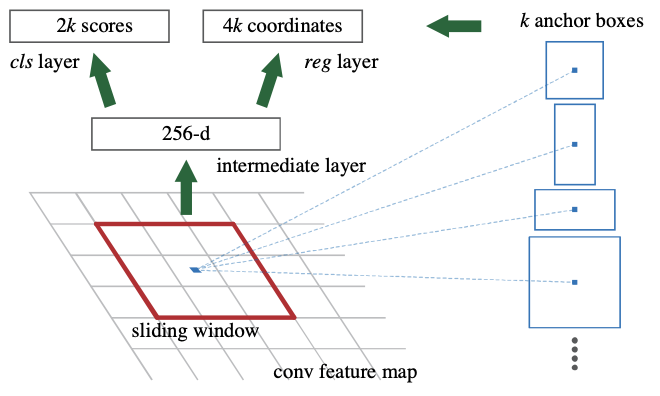

Region Proposal Network (RPN) is convolutional network that predicts objects bounaries and objectness score for each position. In Faster R-CSSs it is used to generate region proposals that are tehn used to determine objects classes and positions.

As seen in the image above, the architectue of RPNs is relatively simple. At the beginning of the process RPS takes an image as input and passes it thorough a **series of convolutional layers** which produce convolutional **feature map**. Then we slide a small(er) **sliding window** (convolutional network) over the convolutional feature map to get potential bouding boxes and their scores. We do this for each position of the sliding location and predict multiple potential bounding boxes -> anchors. **Anchor**s can be used as references to different scales and ratios for each of the sliding window positions. After that, each anchor is passes through **classification and regression layer &&to output a probability score that tells us how likely is that the box has an object -> objectness score, and gives us 4 values that encode the coordinates of the bounding box. Finally, overlapping proposal boxes are processed using NMS - non-maximum suppression method to reduce the number of boxes by choosing to use only those with higher/best objectness scores and discarding others. After this RPM outputs N proposal boxes that are (the most) likely to have objects so RPM passes these to the rest of the netwrok for further processing and classification.

### 1.5 (c)

Souce: https://www.mihaileric.com/posts/fast-object-detection-with-fast-rcnn/


I'm using this source solely for the sake of images as I can use his images to explain step by step methodology/proces or regions generated by RPN.

Example image: A cat and a Dog (very cute ones)

https://www.mihaileric.com/static/cat_and_dog-b88c60bb15e3c1795a2cb69899c205c9-4ad03.jpg


**Answer:**

First step in RPN process is passing our input image throgh several convolutional layers which output a feature map that contains main attributes and structure of the image.

After that we apply a small sliding window accross the feature map, and at the each position of the widow RPN predicts potential bounding boxes - anchors. This can be done on multiple scales and with different aspect ratios so for an example if we defined three scales - small, medium, large - and aspect ratios (1:1, 1:2, and 2:1) for our anchors, at each window positions we would have 9 different anchor boxes of different rectangular shapes and sizes.

The output be something like the following image: https://www.mihaileric.com/static/cat_and_dog_region_proposals-533ed77396bd2732e27bd0dfc356e28d-990fa.png

Next step is for RPNs to make predictions. For instance if we focused on the area around the cat RPN would most likley asign high objectness score to anchors that are close to the size and shape of the cats body or face (e.g., a large-sized square anchor  that also partially coves the dog in the image) and adjust the coordinates of this anchor to better fit the cat. However, other anchors at that location that don't match well with any object in the image would get low objectness scores.

At the end of the process we would have multiple box predictions with objectness scores and cordinates. As this would most likely be a very large number of boxes, we can use NMS (non-maximum suppression) to keep the boxes with high objectness socres and drop the others that have high over lap with the one with high score. After this we would be left with the most relevant boxes that we can pass to the rest of the Faster R-CNN proces and each would be classified e.g. cat, dog, background/neither etc. and their box sizes (if necessary) would be adapted.

This would be end result for cat classification:
https://www.mihaileric.com/static/detected_cat-e8275b62c64e6323bf4f24ee1ff811ec-d970d.png


### 1.5 (d)

**Answer:**

As previously mentioned RPN outputs a lot of potential proposal boxes with objectness scores and coordinates. To minimize this number and disregard irrelevant boxes we can use non-maximum suppression (NMS) to only keep most relevant boxes, those with higest objectness scores. To achieve this NMS first sorts all the boxes in descending order of their objectness scores (likelihoods of containing an object) and selects the boxes with highest scores. After that it looks at all the boxes that have high over lap with those with high scores and discards them if the overlap is larger than preset threshold (e.g. IoU > 0.7). We repeat this elimination porcess for all of our highest scores until we are left with only high scores we want to keep and eliminated all others.

For instance if we have 5 boxes with following objectivencess scores:
- Box 1 = 0.9
- Box 2 = 0.95
- Box 3 = 0.2
- Box 4 = 0.75
- Box 5 = 0.7

And lets say Boxes 1 and 3 overlap with IoU = 0.9 and boxes 4 and 5 over lap with IoU = 0.5.

We will first sort the boxes:
- Box 2 = 0.95
- Box 1 = 0.9
- Box 4 = 0.75
- Box 5 = 0.7
- Box 3 = 0.2

Let's see how they each over lap with others and if their overlaps are larger than our threshold e.g. IoU > 0.7.
- Since box 2 has largest objectness score we look at it first. As it does not over lap with any of the other specified boxes we keep it.
- Next we look at box 1 as it has second largest objectness score. It over laps with box 3 and has IoU larger than our threshold (0.9>0.7) and this we discard box 3 as it has lower objectness score and high IoU.
- Next we look at box 4, it overlaps with box 5 with IoU lower than our threshold so we keep both boxes as long as we are happy with their objectness scores.

In this example we would only eliminate box 3 due to the high IoU but in reality is would be many more boxes, many more overlaps etc.